## Explore Astropy: DL3 -> DL4

In [2]:
import ctools
from sagsci.tools.plotting import SkyImage
from IPython import display

In [3]:
# DL3 file
obs = './data/crab_offax.fits'

# params counts map
trange = [0, 1200]
erange = [0.03, 150]
roi = 5
pixelsize = 0.02
target = {'ra': 83.6331, 'dec': 22.0145}
pointing = {'ra': 83.6331, 'dec': 22.5145}

# params plot
figsize = (5, 5)
fontsize = 10


In [4]:
def run_skymap(obs, output, energy=erange, roi=roi, caldb='prod3b-v2', irf='South_z40_0.5h', wbin=0.02):
    nbin = int(roi*2/wbin)
    skymap = ctools.ctskymap()
    skymap['inobs'] = obs
    skymap['outmap'] = output
    skymap['irf'] = irf
    skymap['caldb'] = caldb
    skymap['emin'] = energy[0]
    skymap['emax'] = energy[1]
    skymap['usepnt'] = True
    skymap['nxpix'] = nbin
    skymap['nypix'] = nbin
    skymap['binsz'] = wbin
    skymap['bkgsubtract'] = 'NONE'
    skymap.execute()

Make skymap with <code>ctools</code> to use as reference.

Coordinate system (CEL - celestial, GAL - galactic) (CEL|GAL) [CEL] Projection method (AIT|AZP|CAR|GLS|MER|MOL|SFL|SIN|STG|TAN) [CAR] 

/data01/homes/dipiano/sagsci/sagsci/tools/plotting.py:349: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  img = plt.imshow(data, norm=SymLogNorm(1), interpolation='gaussian', cmap=cmap)


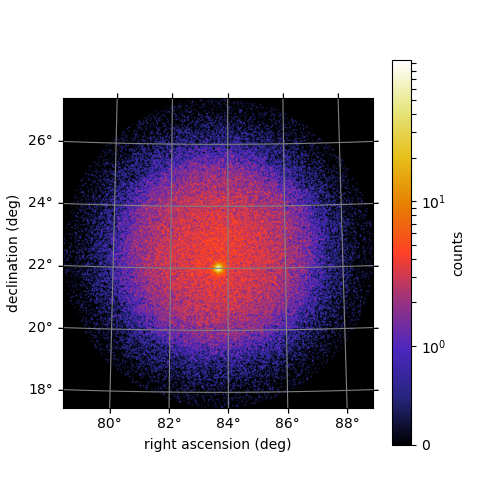

In [5]:
# compute DL4
counts_map = obs.replace('.fits', '_sky.fits')
run_skymap(obs=obs, output=obs.replace('.fits', '_sky.fits'))

# plot
img = counts_map.replace('.fits', '.png')
sky = SkyImage()
sky.plot_fits_skymap(file=counts_map, name=img, figsize=figsize, fontsize=fontsize)
del sky

# display
display.Image(img)

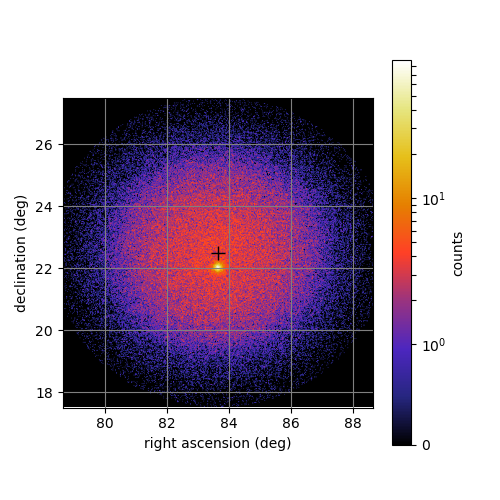

In [7]:
# compute and plot
img = obs.replace('.fits', '_sky2.png')
plot = SkyImage()
plot.set_target_from_dict(target=target).set_pointing_from_dict(pointing=pointing)
plot.counts_map(file=obs, trange=trange, erange=erange, pixelsize=pixelsize, roi=roi, name=img, figsize=figsize, fontsize=fontsize)

# display
display.Image(img)

/data01/homes/dipiano/sagsci/sagsci/tools/plotting.py:321: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  img = ax.imshow(hist[0], norm=SymLogNorm(1), interpolation='gaussian', extent=extent, cmap=cmap)


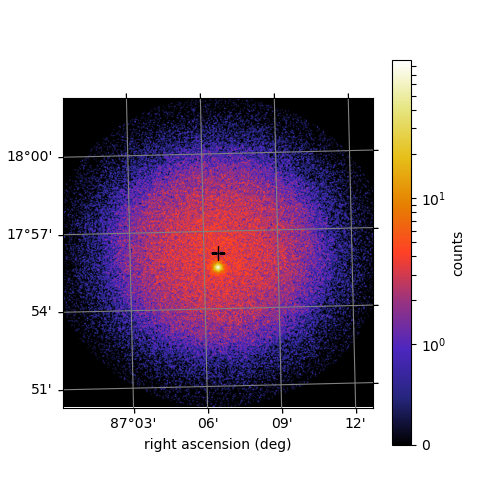

In [8]:
plot.counts_map_with_wcs(file=obs, trange=trange, erange=erange, pixelsize=pixelsize, roi=roi, name=img, figsize=figsize, fontsize=fontsize)

# display
display.Image(img)